# final project - KICKSTARTER

**What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

**Objective**

Goal of this analysis it to be able to predict whether or not a project will receive it's goal funds.

**Data Source:**

https://webrobots.io/kickstarter-datasets/

## import libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import datetime
import math
import time
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# scipy libraries
from scipy import stats
from scipy.stats.mstats import winsorize

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn libraries
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

# balancing libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# language libraries
from textblob import TextBlob
import langid
import yake
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## import data

In [72]:
files = os.listdir('Data')
files

['ks_2021-06-17_1.csv',
 'ks_2021-06-17_2.csv',
 'ks_2021-06-17_3.csv',
 'ks_2021-06-17_4.csv',
 'ks_2021-06-17_5.csv',
 'ks_2021-06-17_6.csv',
 'ks_2021-06-17_7.csv',
 'ks_2021-06-17_8.csv',
 'ks_2021-06-17_9.csv',
 'ks_2021-07-15_1.csv',
 'ks_2021-08-12_1.csv',
 'ks_2021-08-12_2.csv',
 'ks_2021-08-12_3.csv',
 'ks_2021-08-12_4.csv',
 'ks_2021-08-12_5.csv',
 'ks_2021-08-12_6.csv',
 'ks_2021-08-12_7.csv',
 'ks_2021-08-12_8.csv',
 'ks_2021-08-12_9.csv',
 'ks_2021-09-16_1.csv',
 'ks_2021-09-16_2.csv',
 'ks_2021-09-16_3.csv',
 'ks_2021-09-16_4.csv',
 'ks_2021-09-16_5.csv',
 'ks_2021-09-16_6.csv',
 'ks_2021-09-16_7.csv',
 'ks_2021-09-16_8.csv',
 'ks_2021-09-16_9.csv']

In [73]:
files = os.listdir('Data')

df = pd.DataFrame()

path = os.getcwd() + "\\Data" + "\\"

for i in files:
    data = pd.read_csv(path + i)
    df = df.append(data)

## first review and clean data

### review

In [74]:
print("This dataset contains {} rows and {} columns".format(*df.shape))

This dataset contains 94953 rows and 39 columns


In [75]:
df.sample(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
1036,3,Creating the first Cuban/American classical mu...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",50,US,the United States,1484025958,"{""id"":532787385,""name"":""Yalyen Savignon"",""is_r...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1487807365,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.0000,50.000000,international
563,12,Nostalgic 90’s era Care Bears now in gold plat...,"{""id"":1,""name"":""Art"",""analytics_name"":""Art"",""s...",319,US,the United States,1623082980,"{""id"":1439908734,""name"":""SoftgirlCo"",""slug"":""s...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1623355881,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.0000,319.000000,international
3055,109,A 78 card tarot deck with a little bit of ever...,"{""id"":22,""name"":""Illustration"",""analytics_name...",13082,US,the United States,1612369415,"{""id"":1543140293,""name"":""Ritual Muse"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1618113600,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.0000,13082.000000,international
2185,69,"Got an old bomb, filling it with poetry, takin...","{""id"":20,""name"":""Conceptual Art"",""analytics_na...",3213,US,the United States,1259514809,"{""id"":1768073198,""name"":""S.A. Griffin (deleted...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1267264811,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.0000,3213.490000,international
1530,36,Help us to create new and engaging contemporar...,"{""id"":254,""name"":""Performances"",""analytics_nam...",2830,GB,the United Kingdom,1570705765,"{""id"":647057247,""name"":""Amy Petts"",""slug"":""tac...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1579002105,1.283686,"{""web"":{""project"":""https://www.kickstarter.com...",1.2995,2795.867041,international


### review column names

In [76]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_exchange_rate',
       'usd_pledged', 'usd_type'],
      dtype='object')

no cleaning of column names required

### Drop Duplicates

In [77]:
before_dropping_duplicates = df.shape

In [78]:
df = df.drop_duplicates()

In [79]:
after_dropping_duplicates = df.shape

In [80]:
# duplicate rows that have been dropped ... 

before_dropping_duplicates[0] - after_dropping_duplicates[0]

0

### drop duplicate projects with different values

#### check for duplicate projects

In [81]:
df.duplicated(subset='id', keep='first').sum()

34984

#### review duplicates

In [82]:
df[df.duplicated(subset=['id'],keep=False)].sort_values(by=['id'])

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
1646,1,An easy to use call quality monitoring and sal...,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",67,GB,the United Kingdom,1498212299,"{""id"":1108956785,""name"":""Robbie Rouse"",""is_reg...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1505994404,1.287800,"{""web"":{""project"":""https://www.kickstarter.com...",1.349187,64.390007,international
1186,1,An easy to use call quality monitoring and sal...,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",67,GB,the United Kingdom,1498212299,"{""id"":1108956785,""name"":""Robbie Rouse"",""is_reg...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1505994404,1.287800,"{""web"":{""project"":""https://www.kickstarter.com...",1.349187,64.390007,international
208,19,One of the most puzzling figures in world hist...,"{""id"":285,""name"":""Plays"",""analytics_name"":""Pla...",384,GB,the United Kingdom,1580905287,"{""id"":364161953,""name"":""Animikii Theatre"",""slu...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1584215512,1.298691,"{""web"":{""project"":""https://www.kickstarter.com...",1.227000,406.490339,international
1331,19,One of the most puzzling figures in world hist...,"{""id"":285,""name"":""Plays"",""analytics_name"":""Pla...",384,GB,the United Kingdom,1580905287,"{""id"":364161953,""name"":""Animikii Theatre"",""slu...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1584215512,1.298691,"{""web"":{""project"":""https://www.kickstarter.com...",1.227000,406.490339,international
2685,245,"An exploration of gender dysphoria, euphoria, ...","{""id"":252,""name"":""Graphic Novels"",""analytics_n...",5101,US,the United States,1610854301,"{""id"":1417894594,""name"":""Daniel Escargot"",""is_...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1617255017,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,5101.900000,international
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,209,I have sung other people's words for too long....,"{""id"":42,""name"":""Pop"",""analytics_name"":""Pop"",""...",30550,US,the United States,1409618313,"{""id"":1277285372,""name"":""Anne Steele"",""is_regi...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1414854645,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,30550.010000,international
2611,52,"Growing fish and produce year round in the ""Po...","{""id"":305,""name"":""Community Gardens"",""analytic...",2460,CA,Canada,1419960769,"{""id"":1810768137,""name"":""Earl Decker"",""is_regi...",CAD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1423675583,0.860877,"{""web"":{""project"":""https://www.kickstarter.com...",0.795891,2660.971116,international
1231,52,"Growing fish and produce year round in the ""Po...","{""id"":305,""name"":""Community Gardens"",""analytic...",2460,CA,Canada,1419960769,"{""id"":1810768137,""name"":""Earl Decker"",""is_regi...",CAD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1423675583,0.860877,"{""web"":{""project"":""https://www.kickstarter.com...",0.795891,2660.971116,international
1532,53,MOMENTS OF INSIGHT is a project consisting of ...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",18758,US,the United States,1303753700,"{""id"":1743305220,""name"":""Chaucer Silverson"",""i...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1312432269,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,18758.000000,international


#### drop double listing of projects

In [83]:
df = (df.sort_values(by=['id', 'converted_pledged_amount'], ascending=False).drop_duplicates(subset='id', keep= 'first').reset_index(drop=True))

#### set id as index and review shape after drop

In [84]:
df = df.set_index('id')

In [85]:
df.shape

(59969, 38)

### review dtypes

In [86]:
### Review DTypes

df.dtypes

# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia
# df = df.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})


#df = df.astype({'polarity':'int64', 'subjectivity':'int64'})

df.dtypes

backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
country_displayable_name     object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                      object
slug                        

to review

### Null Values

In [87]:
df.isna().any()

backers_count               False
blurb                        True
category                    False
converted_pledged_amount    False
country                     False
country_displayable_name    False
created_at                  False
creator                     False
currency                    False
currency_symbol             False
currency_trailing_code      False
current_currency            False
deadline                    False
disable_communication       False
friends                      True
fx_rate                     False
goal                        False
is_backing                   True
is_starrable                False
is_starred                   True
launched_at                 False
location                     True
name                        False
permissions                  True
photo                       False
pledged                     False
profile                     False
slug                        False
source_url                  False
spotlight     

No null values present in this dataset

### Data Values

In [88]:
for col in data:
    print(data[col].value_counts(), '\n')

0      53
1      46
2      29
3      19
5      12
       ..
198     1
708     1
185     1
184     1
111     1
Name: backers_count, Length: 155, dtype: int64 

The first compilation book of the comic strip Cooper.                                                                                      1
Bluetooth music player that looks (and plays) like a cassette tape. Includes a touch display, headphone jack, memory card slot, & more.    1
Level 11 Theatre is taking theatre to the next level with a full season of pay-what-you-can shows funded by your generous donations.       1
Im sure everyone of us can relate to slap in the face knock-downs, but we all must get up, and hit the reset button!                       1
With your own name.                                                                                                                        1
                                                                                                                                        

### convert timestamps

#### created_at

In [89]:
date = []
time = []
weekday = []

for i in df['created_at']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['created_date'] = date
df['created_time'] = time
df['created_weekday'] = weekday

#### launched_at

In [90]:
date = []
time = []
weekday = []

for i in df['launched_at']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['launched_date'] = date
df['launched_time'] = time
df['launched_weekday'] = weekday

#### deadline

In [91]:
date = []
time = []
weekday = []

for i in df['deadline']:
    date.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d'))
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S'))
    weekday.append(datetime.datetime.fromtimestamp(int(i)).strftime('%A'))

df['deadline_date'] = date
df['deadline_time'] = time
df['deadline_weekday'] = weekday

#### add project duration column

In [92]:
# time between deadline and launched

project_duration = []

for i,j in zip(df.deadline, df.launched_at):
    a = ((i - j) / 60 / 60 / 24)
    project_duration.append(a)
    
df['project_duration'] = project_duration

### goal reached column

In [93]:
conditions = [
    ((df['goal'] - df['converted_pledged_amount']) > 0),
    ((df['goal'] - df['converted_pledged_amount']) <= 0)
]

values = ['no', 'yes']

df['goal_reached'] = np.select(conditions, values)

In [94]:
df['goal_reached'].value_counts()

yes    36493
no     23476
Name: goal_reached, dtype: int64

In [95]:
df['state'].value_counts()

successful    38059
failed        17181
canceled       2569
live           2160
Name: state, dtype: int64

In [96]:
data_crosstab = pd.crosstab(df['state'], df['goal_reached'], margins = False)
data_crosstab

goal_reached,no,yes
state,,
canceled,2503,66
failed,17157,24
live,1472,688
successful,2344,35715


### add goal reached % column

In [97]:
funded_rate = []

for i,j in zip(df.goal, df.converted_pledged_amount):
    a = (j / i)
    funded_rate.append(a)

df['funded_rate'] = funded_rate

### target column

In [98]:
target = []

for i in df['funded_rate']:
    if i >= 1:
        target.append(True)
    else:
        target.append(False)

df['target'] = target     

In [99]:
df.sample(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,launched_date,launched_time,launched_weekday,deadline_date,deadline_time,deadline_weekday,project_duration,goal_reached,funded_rate,target
id,,,,,,,,,,,,,,,,,,,,,
1294483106,334,A 100 percent Independent alternative-media co...,"{""id"":359,""name"":""Print"",""analytics_name"":""Pri...",21161,US,the United States,1528462281,"{""id"":356060393,""name"":""Charlie Deitch"",""is_re...",USD,$,...,2018-06-12,16:18:38,Tuesday,2018-07-02,16:18:38,Monday,20.0,yes,1.410733,True
619124904,46,Tony gets a super-powered suit (cool) only to ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",1611,US,the United States,1459776068,"{""id"":535206268,""name"":""Brent"",""is_registered""...",USD,$,...,2016-05-17,14:13:27,Tuesday,2016-06-18,14:13:27,Saturday,32.0,yes,1.611000,True
765529622,26,The universal coffee color smart tool belt inn...,"{""id"":28,""name"":""Product Design"",""analytics_na...",4822,AT,Austria,1594733853,"{""id"":1909922349,""name"":""Marvin Fox"",""slug"":""m...",EUR,€,...,2021-08-26,23:59:56,Thursday,2021-10-25,23:59:56,Monday,60.0,no,0.892963,False
65893751,25,We've gone as far as we can with what we've go...,"{""id"":239,""name"":""Radio & Podcasts"",""analytics...",1248,US,the United States,1399940311,"{""id"":147215381,""name"":""Joe DeVader"",""is_regis...",USD,$,...,2014-06-01,07:03:12,Sunday,2014-07-01,07:03:12,Tuesday,30.0,yes,1.248000,True
1341889653,28,Limited edition split zine by photographers Ad...,"{""id"":280,""name"":""Photobooks"",""analytics_name""...",697,SE,Sweden,1484997357,"{""id"":1477991173,""name"":""AdeY / Kersti K"",""slu...",SEK,kr,...,2017-01-21,13:01:30,Saturday,2017-02-20,13:01:30,Monday,30.0,no,0.232333,False


### get information from language

#### add language column

In [100]:
language = []

for i in df['blurb']:
    if isinstance(i, float):
        language.append(0)
    else:
        a = langid.classify(i)
        language.append(a[0])        
    
df['language'] = language

In [101]:
df.shape

(59969, 52)

In [102]:
df['language'].value_counts()

en    57135
es      882
fr      587
de      428
it      212
      ...  
fa        1
el        1
rw        1
zu        1
ka        1
Name: language, Length: 62, dtype: int64

#### add polarity and subjectivity column

In [103]:
polarity = []
subjectivity = []

for i in df['blurb']:
    if isinstance(i, float):
        polarity.append(0)
        subjectivity.append(0)
    else:
        a = TextBlob(i)
        polarity.append(round(a.polarity,2))
        subjectivity.append(round(a.subjectivity,2))

df['polarity'] = polarity
df['subjectivity'] = subjectivity

In [104]:
df.shape

(59969, 54)

#### add length for column blurb

In [105]:
length_blurb = []

for i in df['blurb']:
    if isinstance(i, float):
        length_blurb.append(0)
    else:    
        length_blurb.append(len(i))
    
df['length_blurb'] = length_blurb

In [106]:
df.shape

(59969, 55)

#### keyword extractions with yake

In [ ]:
for i in 

In [82]:
kw_extractor = yake.KeywordExtractor()

In [83]:
text = 'How to check if a number is an int or float in Python'

In [84]:
language = 'en'

In [85]:
max_ngram_size = 1

In [86]:
deduplication_threshold = 0.9

In [95]:
numOfKeywords = 3

In [96]:
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

In [97]:
keywords = custom_kw_extractor.extract_keywords(text)

In [98]:
for kw in keywords:
    print(kw)

('Python', 0.08596317751626563)
('check', 0.29736558256021506)
('number', 0.29736558256021506)


### drop columns

In [128]:
to_drop = ['country_displayable_name',
          'created_at',
          'creator',
           'currency_symbol',
           'deadline',
          'disable_communication',
          'friends',
          'is_backing',
          'is_starrable',
          'is_starred',
          'launched_at',
          'permissions',
          'slug',
          'source_url',
          'urls',
          'currency_trailing_code',
          'current_currency',
          'fx_rate',
          'profile',
          'static_usd_rate',
          'usd_exchange_rate',
          'usd_pledged',
          'usd_type',
          'photo',
          'pledged']

In [129]:
df = df.drop(to_drop, axis=1)

KeyError: "['country_displayable_name' 'created_at' 'creator' 'currency_symbol'\n 'deadline' 'disable_communication' 'friends' 'is_backing' 'is_starrable'\n 'is_starred' 'launched_at' 'permissions' 'slug' 'source_url' 'urls'] not found in axis"

In [125]:
df.shape

(59969, 40)

In [126]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'currency', 'currency_trailing_code', 'current_currency',
       'fx_rate', 'goal', 'location', 'name', 'photo', 'pledged', 'profile',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'created_date', 'created_time', 'created_weekday', 'launched_date',
       'launched_time', 'launched_weekday', 'deadline_date', 'deadline_time',
       'deadline_weekday', 'project_duration', 'goal_reached', 'funded_rate',
       'target', 'language', 'polarity', 'subjectivity', 'length_blurb'],
      dtype='object')

In [127]:
df.sample(5)

,backers_count,blurb,category,converted_pledged_amount,country,currency,currency_trailing_code,current_currency,fx_rate,goal,...,deadline_time,deadline_weekday,project_duration,goal_reached,funded_rate,target,language,polarity,subjectivity,length_blurb
id,,,,,,,,,,,,,,,,,,,,,
1013877535,13,We are introducing the accuracy of mouse and k...,"{""id"":270,""name"":""Gaming Hardware"",""analytics_...",934,NL,EUR,False,USD,1.199377,250000.0,...,01:44:18,Saturday,60.000000,no,0.003736,False,en,0.15,0.60,125
1583213181,26,Your donation will make it possible for us to ...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",5024,US,USD,True,USD,1.000000,5000.0,...,23:07:15,Friday,47.000000,yes,1.004800,True,en,0.00,1.00,125
512427463,4,"We need your help to get the new album ready, ...","{""id"":321,""name"":""Punk"",""analytics_name"":""Punk...",87,US,USD,True,USD,1.000000,5000.0,...,19:42:37,Sunday,60.000000,no,0.017400,False,en,0.18,0.38,129
331472362,3,web platform for Universities students where t...,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",3,IT,EUR,False,USD,1.171863,56000.0,...,08:41:54,Tuesday,60.000000,no,0.000054,False,en,0.00,0.00,124
913305711,18,It’s Imagination Installations’ 1st Birthday a...,"{""id"":53,""name"":""Public Art"",""analytics_name"":...",525,US,USD,True,USD,1.000000,295.0,...,05:59:00,Thursday,12.422986,yes,1.779661,True,en,0.00,0.10,113


### split numeric and categorical data

In [114]:
# final shape of cleaned data

df.shape

(59969, 40)

## Explore Cleaned Data

### validate target variable

"As of July 2021, the success rate of fully funding a project on the crowdfunding website was 38.92 percent. Overall, 5.4 billion U.S. dollars have gone into successfully launched projects."

https://www.statista.com/statistics/235405/kickstarter-project-funding-success-rate/

In [115]:
data_crosstab = pd.crosstab(df['state'], df['target'], margins = False)
data_crosstab

target,False,True
state,,
canceled,2503,66
failed,17157,24
live,1472,688
successful,2344,35715


### numerical variables

### categorical variables

#### wordcloud

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.searchenginejournal.com/predict-content-success-python/387064/#close

In [116]:
?WordCloud

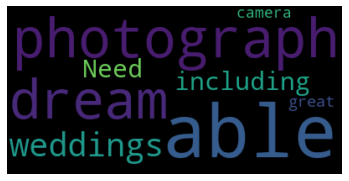

In [117]:
# Start with one review:
text = df['blurb'].iloc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### mixed analysis

### projects per weekday

In [118]:
df.groupby(["target"])["funded_rate"].mean().sort_values(ascending=False)

target
True     9.920058
False    0.134543
Name: funded_rate, dtype: float64

In [119]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'currency', 'currency_trailing_code', 'current_currency',
       'fx_rate', 'goal', 'location', 'name', 'photo', 'pledged', 'profile',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'created_date', 'created_time', 'created_weekday', 'launched_date',
       'launched_time', 'launched_weekday', 'deadline_date', 'deadline_time',
       'deadline_weekday', 'project_duration', 'goal_reached', 'funded_rate',
       'target', 'language', 'polarity', 'subjectivity', 'length_blurb'],
      dtype='object')

### projects per category

### Check for Correlation

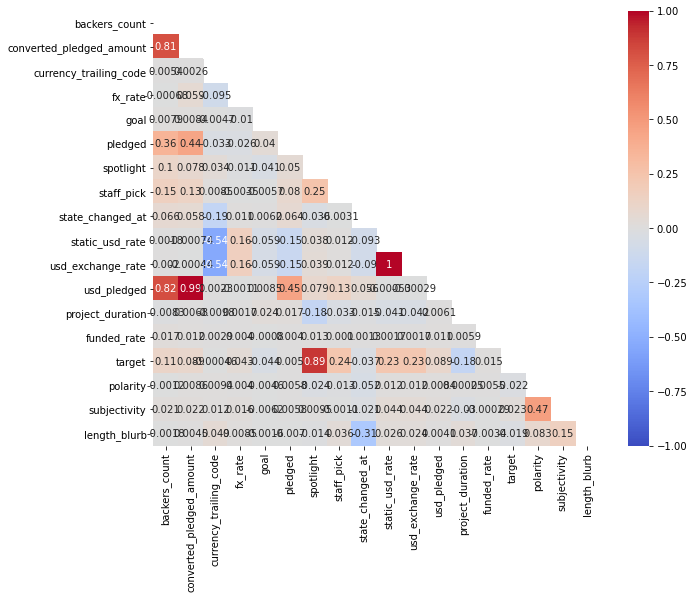

In [120]:
#round(df.corr()['death_event'].sort_values(ascending=False),2)

# create correlation heatmap 

mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

## data imbalances

### check whether data is imbalanced

True     36493
False    23476
Name: target, dtype: int64

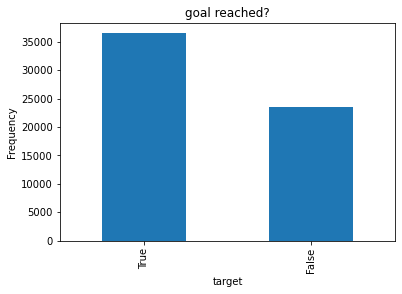

In [121]:
pd.value_counts(df['target']).plot.bar()
plt.title('goal reached?')
plt.xlabel('target')
plt.ylabel('Frequency')
df['target'].value_counts()

**YES** our data is imbalanced, as we have 13.324 'no' values and 2.313 'yes' values

### deal with imbalances

In [177]:
# upscaling

In [190]:
rake_nltk_var = Rake()

text = """Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others."""

rake_nltk_var.extract_keywords_from_text(text)

keyword_extracted = rake_nltk_var.get_ranked_phrases()

print(keyword_extracted)

['imaginative projects', 'funding platform', 'direct support', 'creative projects', 'technology', 'others', 'music', 'life', 'kickstarter', 'kickstarter', 'innovative', 'games', 'full', 'film', 'everything', 'design', 'brought', 'art', 'ambitious']
